# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read Data

In [3]:
df = pd.read_csv('Classified Data',index_col=0)

In [4]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


# Normalization of Data Points(Features part)

Now we need to normalize the data points because of the problem mentioned here https://stats.stackexchange.com/a/287439

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
feat_scaled = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [9]:
feat_scaled

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [10]:
df_feat_scaled = pd.DataFrame(feat_scaled,columns=df.columns[:-1])

In [11]:
df_feat_scaled.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# Building K-nearest neighbour model

### Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
 X_train, X_test, y_train, y_test = train_test_split(df_feat_scaled, df['TARGET CLASS'], test_size=0.30, random_state=101)

### Create and Train Model

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [17]:
pred = knn.predict(X_test)

### Evaluation

In [18]:
from sklearn.metrics import confusion_matrix,classification_report

In [19]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[151   8]
 [ 15 126]]
             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



# Calculation of Error Rate for each K Value and plotting it to find the K-value with minimum error rate

In [20]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [21]:
error_rate

[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05,
 0.05,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.04666666666666667,
 0.05333333333333334,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.05]

Text(0,0.5,'Error Rate')

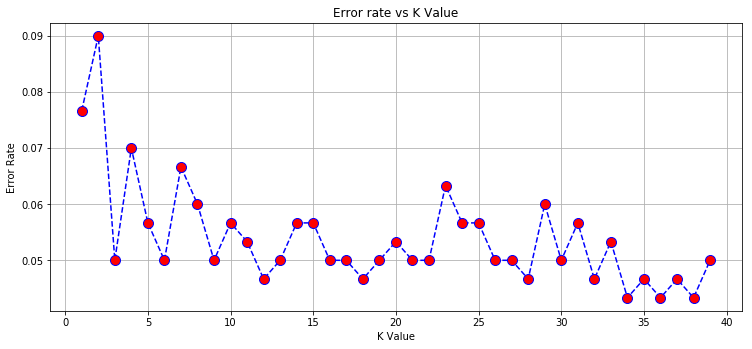

In [22]:
fig = plt.figure(figsize=(12,5))
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.grid('on')
axes.plot(range(1,40),error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
axes.set_title('Error rate vs K Value')
axes.set_xlabel('K Value')
axes.set_ylabel('Error Rate')

In [25]:
#Interactive version of Error rate vs K Value line graph

#Offline Version
# from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
# import plotly.graph_objs as go
# init_notebook_mode(connected=True)

#Online version
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Scatter(
    x = list(range(1,40)),
    y = error_rate,
    mode = 'lines+markers',
    name = 'error rate name',
    marker = dict(
            color = ('rgb(255,0,0)'),
            size = 10
    ),
    line = dict(
            color = ('rgb(0,0,255)'),
            width = 2,
            dash = 'dash')
)

layout = go.Layout(
    title='Error rate vs K Value',
    xaxis=dict(
        title='K Value',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Error Rate',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

data = [trace0]
fig = go.Figure(data=data, layout=layout)
py.plot(fig)
# Use py.plot() to return the unique url and optionally open the url.
# Use py.iplot() when working in a Jupyter Notebook to display the plot in the notebook.

'https://plot.ly/~naushadshukoor/2'

# Evaluation of KNN model with K value set to best K value

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

# Conclusion

When K value is 18, The error rate is minimum. By creating and training model with k-value=18, we achieve 0.03 % increase in prediction accuracy.